## Name: Nitin Borse

## Task_2: Prediction using Unsupervised ML

## GRIP @ Spark Foundation

#### Aim:- The given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

## Step_1:Reading the Data from source file

In [2]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Step_2:Cleaning Dataset

In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

## Step_3:Building a Model

In [6]:
x=df

### Elbow Method

Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [7]:
k=[1,2,3,4,5,6,7,8,9,10]

In [8]:
from sklearn.cluster import KMeans
color=["g","b","y","g","o"]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

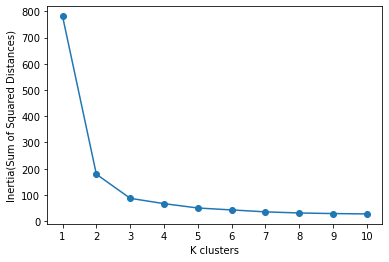

In [9]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

## Creating Kmeans Classifier

In [10]:
model=KMeans(n_clusters=4)
model.fit(x)

KMeans(n_clusters=4)

In [11]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0])

In [12]:
model.cluster_centers_

array([[6.32777778, 2.925     , 5.30277778, 2.00277778, 1.97222222],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [5.9       , 2.76      , 4.25      , 1.326     , 1.02      ],
       [7.38571429, 3.13571429, 6.22857143, 2.08571429, 2.        ]])

In [13]:
model.n_iter_

7

In [14]:
data=df
data["Group"]=model.labels_

In [15]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,Group
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


## Selecting only two features for model for visualization of Clusters

In [16]:
x=df[[ 'sepal_length', 'sepal_width',]]

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

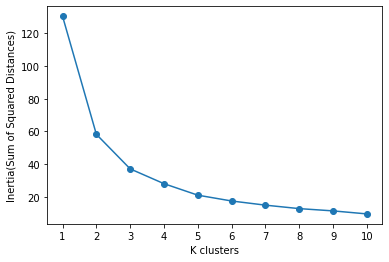

In [17]:
k=[1,2,3,4,5,6,7,8,9,10]
from sklearn.cluster import KMeans
color=["g","b","y","g","o"]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_ )
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")    

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 6.

## Creating Kmeans Classifier

In [26]:
model=KMeans(n_clusters=6)
model.fit(x)
model.labels_

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 5, 3, 3,
       2, 3, 2, 3, 2, 3, 1, 4, 1, 0, 4, 0, 4, 5, 4, 5, 5, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 0, 4, 0, 5, 0, 0, 0, 4, 5, 0, 4, 0, 1, 4, 4, 1, 5, 1, 4, 1,
       4, 4, 4, 0, 0, 4, 4, 1, 1, 0, 1, 0, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1,
       4, 4, 0, 1, 4, 4, 0, 1, 4, 1, 0, 4, 4, 4, 0, 4, 4, 0])

In [24]:
centeroid=model.cluster_centers_
centeroid

array([[7.475     , 3.125     ],
       [5.268     , 3.704     ],
       [5.90487805, 2.76341463],
       [4.75416667, 3.1875    ],
       [6.57777778, 3.05      ],
       [5.175     , 2.40833333]])

In [20]:
model.n_iter_

4

## Cluster Visualization

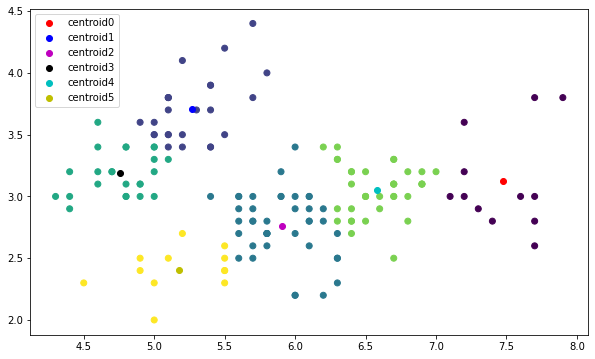

In [25]:
#plotting the clusters
fig=plt.figure(figsize=(10,6))
plt.scatter(df['sepal_length'],df['sepal_width'],c=model.labels_)
color=["r","b","m","k","c","y"]
for i in range(centeroid.shape[0]):
    plt.scatter(centeroid[i][0],centeroid[i][1],color=color[i], label=str("centroid"+str(i)))
plt.legend()

In [27]:
data=df
data["Group"]=model.labels_

In [28]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,Group
0,5.1,3.5,1.4,0.2,0,3
1,4.9,3.0,1.4,0.2,0,3
2,4.7,3.2,1.3,0.2,0,3
3,4.6,3.1,1.5,0.2,0,3
4,5.0,3.6,1.4,0.2,0,3
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,4
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,4
148,6.2,3.4,5.4,2.3,2,4


## Conclusion

In this ‘Iris’ dataset,when Kmean Classifier model used and  predict the optimum number of clusters 4 for all features And using 2 feature predict the optimum number of clusters 6 
and represent it visualization.